In [183]:
import os
from six.moves import urllib
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer

In [184]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening"
CREDIT_DATA_URL = DOWNLOAD_ROOT + "/crx.data"
CREDIT_DATA_PATH = "datasets/credit-screening"

In [185]:
# fetch data from its origin

def fetch_credit_crad_data(credit_data_url=CREDIT_DATA_URL, credit_path=CREDIT_DATA_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    credit_data_path = os.path.join(credit_path, "crx.data")
    urllib.request.urlretrieve(credit_data_url, credit_data_path)

fetch_credit_crad_data()

In [186]:
# load the dataset to pandas dataframe

def load_credit_card_data(credit_data_path=CREDIT_DATA_PATH):
    csv_path=os.path.join(credit_data_path, "crx.data")
    pd.set_option('display.max_columns', None)
    return pd.read_csv(csv_path, header=None)

credit_card_data = load_credit_card_data()

# get a quick view of the data

credit_card_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [187]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [188]:
credit_card_data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [189]:
credit_card_data.describe(include='O')

,0,1,3,4,5,6,8,9,11,12,13,15
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


##### from here the dataset is divided to a train set and a test set

In [190]:
# method that can create a test set

def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))    
    test_set_size = int(len(data) * test_ratio)    
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [191]:
cc_train_set, cc_test_set = split_train_test(credit_card_data, 0.305)
print(len(cc_train_set), 'train + ', len(cc_test_set), 'test')

480 train +  210 test


In [192]:
cc_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 80 to 220
Data columns (total 16 columns):
0     480 non-null object
1     480 non-null object
2     480 non-null float64
3     480 non-null object
4     480 non-null object
5     480 non-null object
6     480 non-null object
7     480 non-null float64
8     480 non-null object
9     480 non-null object
10    480 non-null int64
11    480 non-null object
12    480 non-null object
13    480 non-null object
14    480 non-null int64
15    480 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 63.8+ KB


In [193]:
cc_train_set.describe(include='O')

,0,1,3,4,5,6,8,9,11,12,13,15
count,480,480,480,480,480,480,480,480,480,480,480,480
unique,3,290,4,4,15,10,2,2,2,3,139,2
top,b,22.67,u,g,c,v,t,f,f,g,00000,-
freq,333,9,360,360,95,272,250,284,257,429,92,268


In [194]:
def drop_nan_values(data):
    return data.replace('?', np.nan).replace('+', 1).replace('-', 0).dropna()

In [195]:
cc_train_set = drop_nan_values(cc_train_set)

In [196]:
cc_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 80 to 220
Data columns (total 16 columns):
0     459 non-null object
1     459 non-null object
2     459 non-null float64
3     459 non-null object
4     459 non-null object
5     459 non-null object
6     459 non-null object
7     459 non-null float64
8     459 non-null object
9     459 non-null object
10    459 non-null int64
11    459 non-null object
12    459 non-null object
13    459 non-null object
14    459 non-null int64
15    459 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 61.0+ KB


In [197]:
encoder = LabelEncoder()
def obj_to_num(dataset):
    
    for col in dataset:
        if dataset[col].dtype == 'object':
            dataset[col] = encoder.fit_transform(dataset[col])
    return dataset

In [198]:
cc_train_set = obj_to_num(cc_train_set)

In [199]:
cc_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 80 to 220
Data columns (total 16 columns):
0     459 non-null int32
1     459 non-null int32
2     459 non-null float64
3     459 non-null int32
4     459 non-null int32
5     459 non-null int32
6     459 non-null int32
7     459 non-null float64
8     459 non-null int32
9     459 non-null int32
10    459 non-null int64
11    459 non-null int32
12    459 non-null int32
13    459 non-null int32
14    459 non-null int64
15    459 non-null int64
dtypes: float64(2), int32(11), int64(3)
memory usage: 41.2 KB


In [200]:
cc_train_set[15].value_counts()

0    254
1    205
Name: 15, dtype: int64

In [201]:
cc_train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
0,459.0,0.703704,0.457121,0.0,0.000,1.0,1.0000,1.0
1,459.0,123.947712,76.869946,0.0,60.000,113.0,185.5000,280.0
2,459.0,4.923638,5.105039,0.0,1.000,3.0,8.0000,28.0
3,459.0,1.230937,0.432119,0.0,1.000,1.0,1.0000,2.0
4,459.0,0.474946,0.849431,0.0,0.000,0.0,0.0000,2.0
5,459.0,5.753813,4.269108,0.0,1.000,5.0,10.0000,13.0
6,459.0,5.045752,2.542237,0.0,3.000,7.0,7.0000,8.0
7,459.0,2.241416,3.443185,0.0,0.165,1.0,2.6875,28.5
8,459.0,0.529412,0.499679,0.0,0.000,1.0,1.0000,1.0
9,459.0,0.418301,0.493818,0.0,0.000,0.0,1.0000,1.0


In [202]:
corr = cc_train_set.corr()

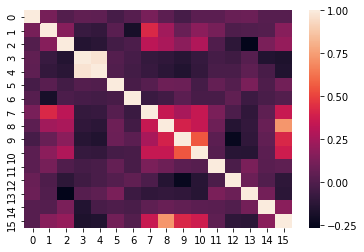

In [203]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [204]:
corr[15].sort_values()

3    -0.165914
4    -0.151658
13   -0.117366
12   -0.107861
6     0.009700
0     0.016706
11    0.043701
5     0.104273
1     0.168232
14    0.172438
2     0.208496
7     0.353633
10    0.372434
9     0.419758
8     0.724082
15    1.000000
Name: 15, dtype: float64

In [205]:
cc_train_set.drop([1, 2, 3, 4, 5, 13, 12, 0, 6, 11, 14], axis=1, inplace=True)
    

In [206]:
cc_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 80 to 220
Data columns (total 5 columns):
7     459 non-null float64
8     459 non-null int32
9     459 non-null int32
10    459 non-null int64
15    459 non-null int64
dtypes: float64(1), int32(2), int64(2)
memory usage: 17.9 KB


In [207]:
corr = cc_train_set.corr()

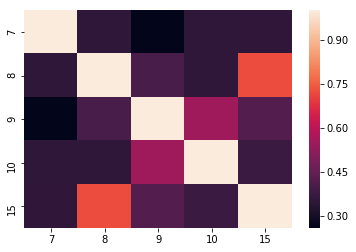

In [208]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

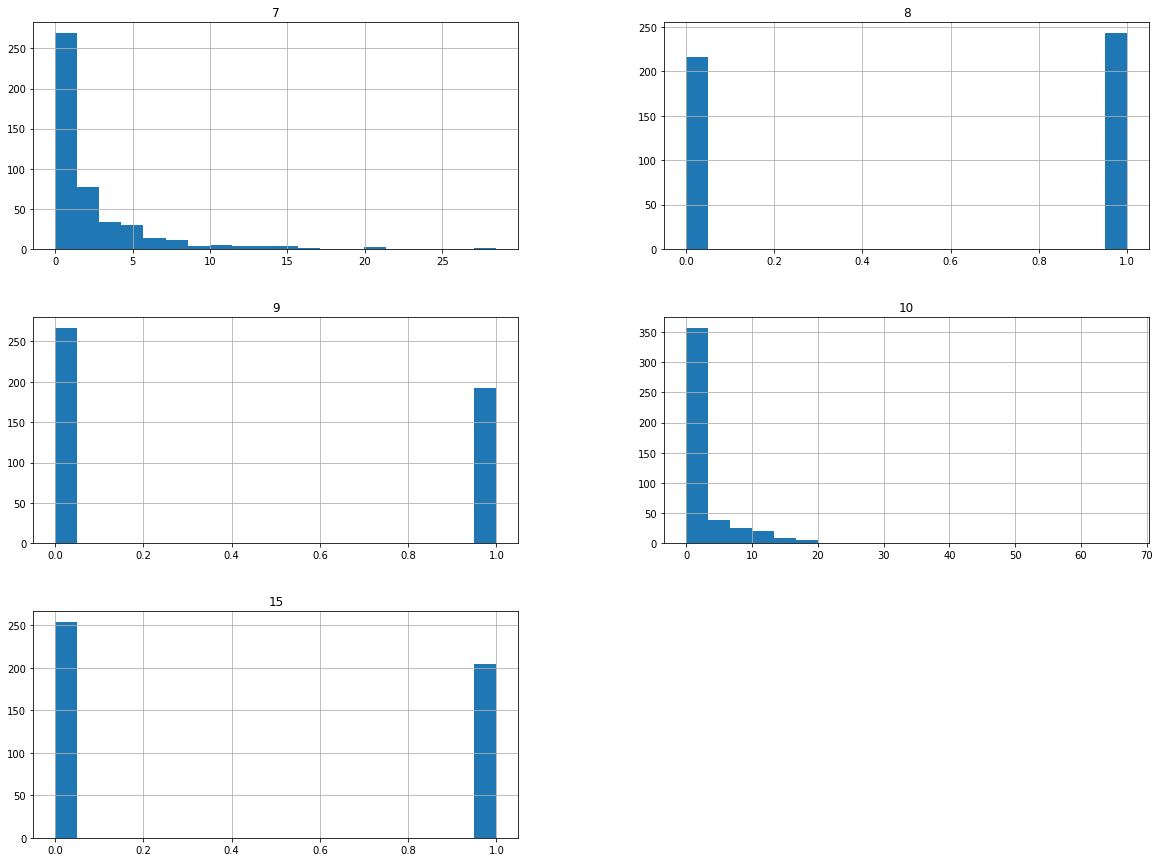

In [210]:
cc_train_set.hist(bins=20, figsize=(20, 15))
plt.show()

In [211]:
cc_train_set.describe()

,7,8,9,10,15
count,459.000000,459.000000,459.000000,459.000000,459.000000
mean,2.241416,0.529412,0.418301,2.498911,0.446623
std,3.443185,0.499679,0.493818,5.356453,0.497685
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.165000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.687500,1.000000,1.000000,3.000000,1.000000
max,28.500000,1.000000,1.000000,67.000000,1.000000


In [ ]:
# transform data so they are 0 - 1
# one hot encoding??
# split dataset to x_train, x_set, y_train, y_set??